In [2]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import os
import sys

parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [3]:
# MPC import
from LinearMPC.MPCVelControl import MPCVelControl
from PIControl.PIControl import PIControl
import numpy as np
from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

Simulation and Set Plotting


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Maximum invariant set successfully computed after 15 iterations.
Maximum invariant set successfully computed after 15 iterations.





 State beta violation: -0.20 < -0.17, 
 State alpha violation: 0.20 > 0.17, 

 State beta violation: -0.31 < -0.17, 
 State alpha violation: 0.32 > 0.17, 

 State beta violation: -0.43 < -0.17, 
 State alpha violation: 0.47 > 0.17, 

 State beta violation: -0.54 < -0.17, 
 State alpha violation: 0.63 > 0.17, 

 State beta violation: -0.63 < -0.17, 
 State alpha violation: 0.79 > 0.17, 

 State beta violation: -0.70 < -0.17, 
 State alpha violation: 0.93 > 0.17, 

 State bet

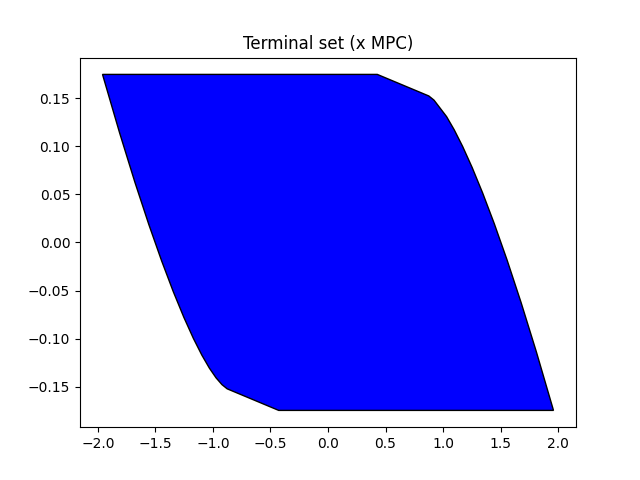

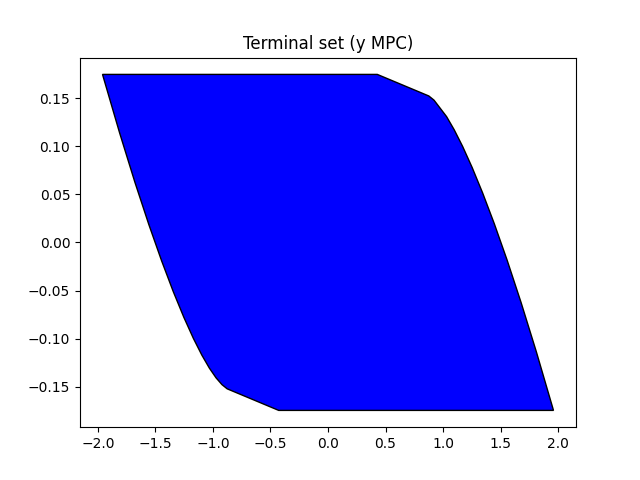

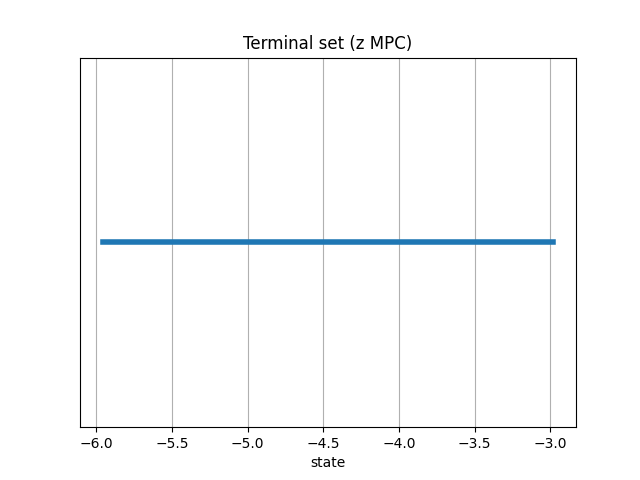

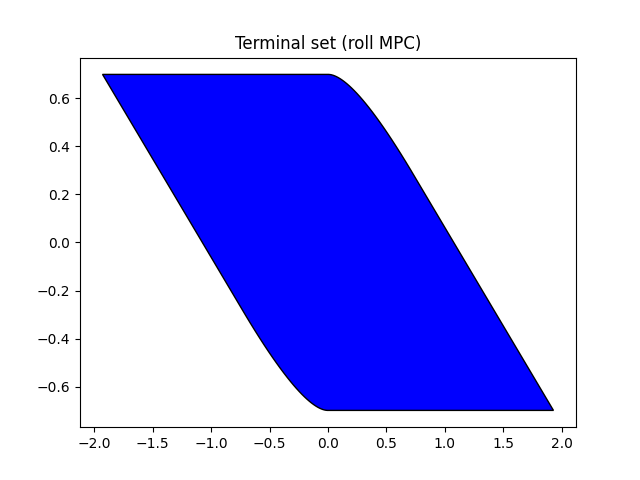

In [4]:
Ts = 0.05
sim_time = 20
H = 5.0
x0 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 50, 50, 100])  # initial state
pos_target = np.array([0, 0, 10.0])

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
pos_controller = PIControl(pos_target)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, ref = rocket.simulate_control(
    mpc, sim_time, H, x0, pos_control=pos_controller, method="nonlinear"
)

Open Loop Plots

In [ ]:
vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(
    t_cl[:-1]*0,
    x_cl[:, :-1]*0,
    u_cl*0,
    Ref=ref[:, :-1],
    T_ol=t_ol[..., :-1],
    X_ol=x_ol,
    U_ol=u_ol,
);

c:\Users\hippo\Documents\Personal files\EPFL\Courses\MPC\MPC-Course-EPFL_AO\project\src\vel_rocket_vis.py:416: RuntimeWarning: divide by zero encountered in scalar divide
  step = max(1, np.ceil(1 / (Ts * max_fps)).astype(int))
c:\Users\hippo\Documents\Personal files\EPFL\Courses\MPC\MPC-Course-EPFL_AO\project\src\vel_rocket_vis.py:416: RuntimeWarning: invalid value encountered in cast
  step = max(1, np.ceil(1 / (Ts * max_fps)).astype(int))


AppLayout(children=(HBox(children=(Play(value=0, description='Press play', interval=0, max=399), IntSlider(val…

Exception raised
KeyError('597f0015fa933f648126cf14e1f7bee5_72L')
Traceback (most recent call last):
  File "c:\Users\hippo\anaconda3\envs\mpc2025\Lib\site-packages\wslink\protocol.py", line 324, in onCompleteMessage
    results = func(*args, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\hippo\anaconda3\envs\mpc2025\Lib\site-packages\trame_vtk\modules\vtk\protocols\local_rendering.py", line 33, in get_array
    self.context.get_cached_data_array(data_hash, binary)
  File "c:\Users\hippo\anaconda3\envs\mpc2025\Lib\site-packages\trame_vtk\modules\vtk\serializers\synchronization_context.py", line 41, in get_cached_data_array
    cache_obj = self.data_array_cache[p_md5]
                ~~~~~~~~~~~~~~~~~~~~~^^^^^^^
KeyError: '597f0015fa933f648126cf14e1f7bee5_72L'

Exception raised
KeyError('4a2f997f88eee2e86776dc9512b92e8f_6d')
Traceback (most recent call last):
  File "c:\Users\hippo\anaconda3\envs\mpc2025\Lib\site-packages\wslink\protocol.py", line 324, in onCompleteMessa

Closed Loop Plots

In [6]:
vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(
    t_cl[:-1],
    x_cl[:, :-1],
    u_cl,
    Ref=ref[:, :-1]);

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=399, step=2), IntSlider(value=0…

Closed and Open Loop Plots

In [7]:
vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(
    t_cl[:-1],
    x_cl[:, :-1],
    u_cl,
    Ref=ref[:, :-1],
    T_ol=t_ol[..., :-1],
    X_ol=x_ol,
    U_ol=u_ol,
);

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=399, step=2), IntSlider(value=0…